In [12]:
import pandas as  pd
import numpy as np
import warnings 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 
from scipy import stats
import pandas_profiling
from IPython import display
%matplotlib inline
warnings.filterwarnings('ignore')

In [13]:
import torch
# 生成数据集
num_inputs = 2
num_examples = 1000

true_w = [10.8, 5.5]
true_b = 6.1

In [14]:
train_X = np.random.normal(0, 1, size=(1000,2))
train_y = true_w[0] * train_X[:, 0] + true_w[1] * train_X[:, 1] + true_b
train_y += np.random.normal(0, 0.01, size=1)

([array([ 0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  4.,  5.,  6.,  9.,
          8., 11., 16., 15., 23., 19., 38., 47., 39., 46., 46., 48., 50.,
         63., 54., 52., 53., 50., 39., 50., 35., 33., 31., 21., 15., 16.,
          9., 18.,  5.,  6.,  4.,  3.,  3.,  4.,  0.,  1.,  1.]),
  array([ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  4.,  2.,  4.,  5.,  7.,
          7., 10., 23., 16., 23., 26., 30., 36., 39., 51., 47., 41., 58.,
         53., 55., 61., 55., 55., 52., 51., 28., 32., 30., 21., 22., 15.,
         14.,  9.,  8.,  3.,  1.,  2.,  1.,  0.,  0.,  0.,  0.])],
 array([-3.78658473, -3.64686757, -3.50715041, -3.36743325, -3.22771609,
        -3.08799893, -2.94828177, -2.8085646 , -2.66884744, -2.52913028,
        -2.38941312, -2.24969596, -2.1099788 , -1.97026164, -1.83054448,
        -1.69082732, -1.55111016, -1.411393  , -1.27167584, -1.13195868,
        -0.99224152, -0.85252435, -0.71280719, -0.57309003, -0.43337287,
        -0.29365571, -0.15393855, -0.01422139,  0.12549577

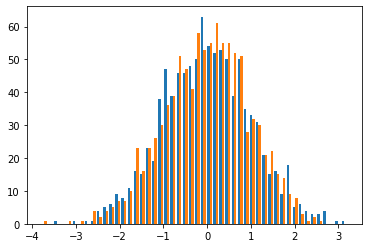

In [15]:
plt.hist(train_X,50)

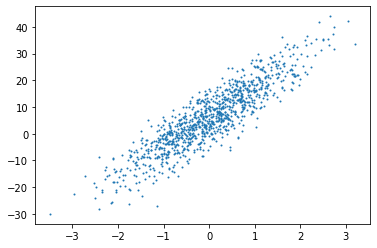

In [16]:
plt.scatter(train_X[:,0],train_y,1)

In [17]:
m = train_X.shape[1]
n_x = train_X.shape[0]
n_h = 3
n_y = 1
print('m',m)
print('n_x',n_x)
print('n_h',n_h)

m 2
n_x 1000
n_h 3


In [18]:
W1 = np.random.normal(0,1, (2, 1))
b = 1

In [19]:
def lr_model(X,W1,b1):
    return np.dot(X,W1) + b1
def squared_loss(y_hat, y): 
    return (y_hat - y) ** 2 / 2

def backward_propagation(W,b,y_hat, y,x,lr):
    W -= np.dot((y_hat - y).reshape(1,1000),x).reshape(2,1) * lr
    b -= (y_hat - y) *lr
    return W,b.mean()

In [20]:
for epoch in range(5000):
    output = lr_model(train_X,W1,b)  #(1000, 1)
    loss = squared_loss(output.reshape(len(train_y)),train_y).reshape(1,1000)
    W1,b = backward_propagation(W1,b,output.reshape(len(train_y)),train_y,train_X,0.001)
print('epoch: ',epoch,'| loss: ',loss.mean())
print('W1, b为：',W1,b)

epoch:  4999 | loss:  0.0005962534692719423
W1, b为： [[10.80012015]
 [ 5.49934658]] 6.090079526346617
